In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import chi2_contingency

In [53]:
df = pd.read_csv('D:\Documents2\python folder\DAI_assignment\movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [54]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [55]:
#Drop null values
df=df.drop(["Gross"],axis=1)

df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
dtype: int64

In [60]:
#Drop duplicate values
df=df.drop_duplicates(subset=["MOVIES"])

#Drop null rows
df = df.dropna(axis=0)

In [61]:
#Number of unique values in each attribute

for i in df.columns :
    print(f"Number of unique values in {i} attribute is : {df.nunique()[i]}")

Number of unique values in MOVIES attribute is : 5146
Number of unique values in YEAR attribute is : 397
Number of unique values in GENRE attribute is : 465
Number of unique values in RATING attribute is : 77
Number of unique values in ONE-LINE attribute is : 5074
Number of unique values in STARS attribute is : 5071
Number of unique values in VOTES attribute is : 3685
Number of unique values in RunTime attribute is : 260


In [62]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0


In [68]:
df['Quantized_RATING'] = pd.cut(df['RATING'], bins=10,labels=[0,1,2,3,4,5,6,7,8,9])

In [69]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Quantized,Quantized_RATING
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,6,6
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,4,4
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,8,8
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,9,9
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,7,7


In [70]:
#Finding outliers in numeric columns. Here, have found outliers by RATING.

outliers=[]
col="RATING"

Q1=df[col].quantile(0.25)
Q2=df[col].quantile(0.5)
Q3=df[col].quantile(0.75)
IQR = Q3-Q1
for i in df[col] :
    if (i>(Q3 +1.5*IQR)) or (i<(Q1-1.5*IQR)) :
        outliers.append(i)

print(f"In {col} column, there are {len(outliers)} outliers")

In RATING column, there are 94 outliers


Univariate Analysis

1. Categorical Data

    (a) Bar Plot

In [79]:
category_counts = df.groupby('Quantized_RATING')['MOVIES'].count()
df['category_counts']=category_counts 

C:\Users\SURENDRAPAL SINGH\AppData\Local\Temp\ipykernel_13144\84228320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df.groupby('Quantized_RATING')['MOVIES'].count()


In [80]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Quantized,Quantized_RATING,category_counts
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,6,6,2.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,4,4,23.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,8,8,69.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,9,9,190.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,7,7,823.0


In [133]:
unique_values_list = df['Quantized_RATING'].value_counts()
print(unique_values_list)
x=[6,7,5,8,4,3,9,2,1,0]

Quantized_RATING
6    1406
7    1345
5     823
8     757
4     398
3     190
9     133
2      69
1      23
0       2
Name: count, dtype: int64


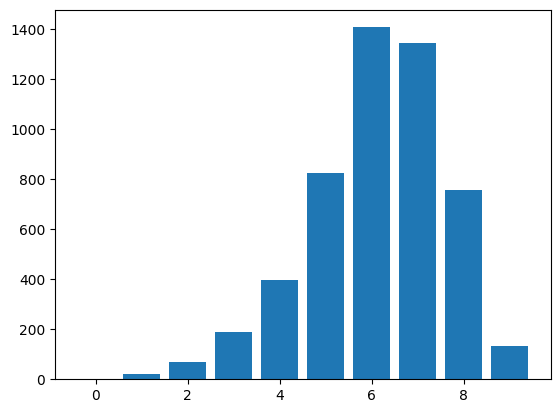

In [93]:
#Plotting bar plot
plt.bar(x=x,height=unique_values_list)
plt.show()



(b) Pie Chart

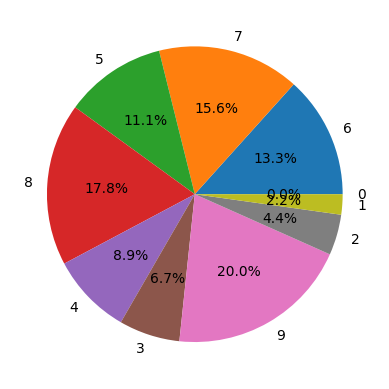

In [135]:
#Analysing distribution of Movies according to Rating

plt.pie(x=x,autopct="%1.1f%%",labels=x)
plt.show()


2. Numerical Data

   (a) Boxplot

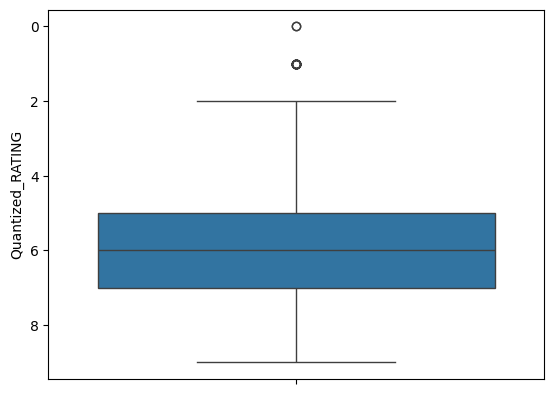

In [95]:
#oxplot of Movies according to their Rating
sns.boxplot(df['Quantized_RATING'])
plt.show()


(b) Histogram and KDE plot

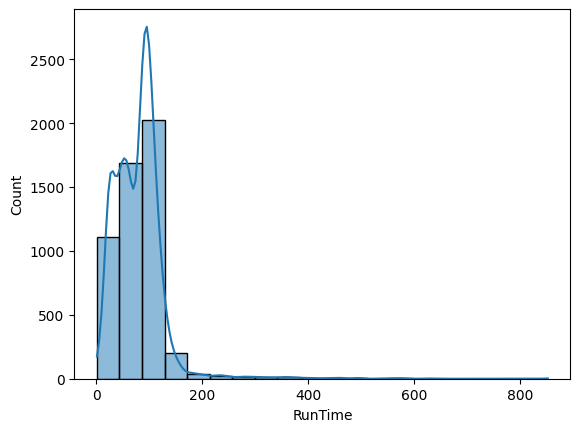

In [106]:
#Analysing 

sns.histplot(df.RunTime,bins=20,kde=True)
plt.show()

#Peaks occur around RunTime of 100.

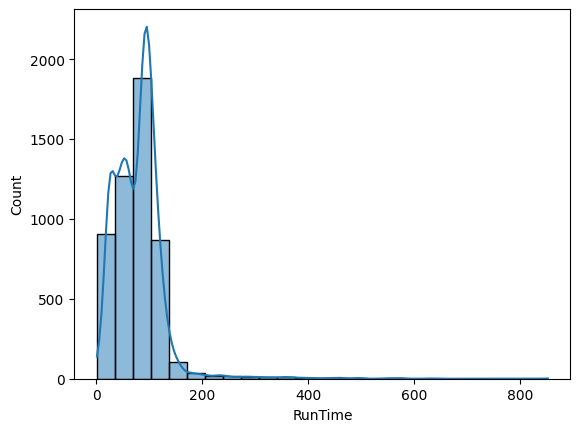

Skew of RunTime column is 3.723255613116434
Mean of  RunTime is 79.13466770307035
Stdev of  RunTime is 49.698374330892186


In [108]:
print(f"Skew of RunTime column is {df.RunTime.skew()}")
print(f"Mean of  RunTime is {df.RunTime.mean()}")
print(f"Stdev of  RunTime is {df.RunTime.std()}")


Bivariate Analysis

(1.) Numerical-Numerical

(a) Scatterplot

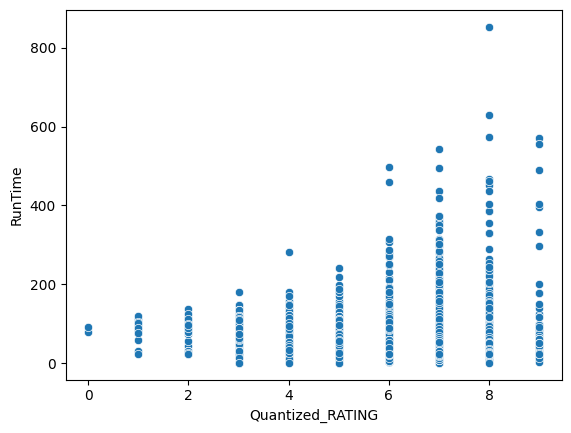

Correlation between Quantized_RATING and RunTime is -0.10591724247586458


In [140]:
#Making scatterplot of Runtime and Quantized_RATING
sns.scatterplot(x=df.Quantized_RATING,y=df.RunTime)
plt.show()

print(f"Correlation between Quantized_RATING and RunTime is {df.Quantized_RATING.corr(df.RunTime)}")


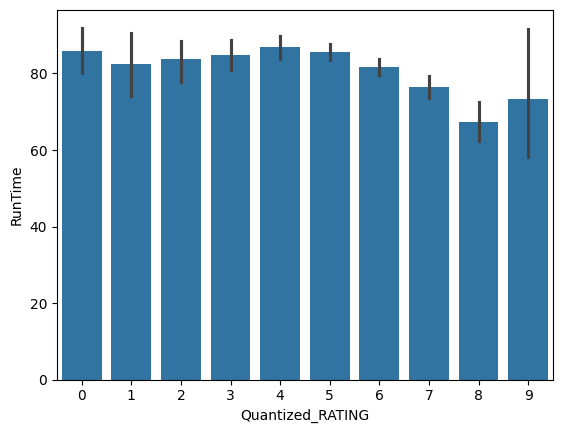

In [114]:
#Bar plot betweeen : Quantized_RATING and RunTime
sns.barplot(x=df.Quantized_RATING,y=df.RunTime,estimator="mean")
plt.show()

#Inference : The average are almost equal for Runtime from all different ratings

(b.) Boxplot - Bivariate

[]

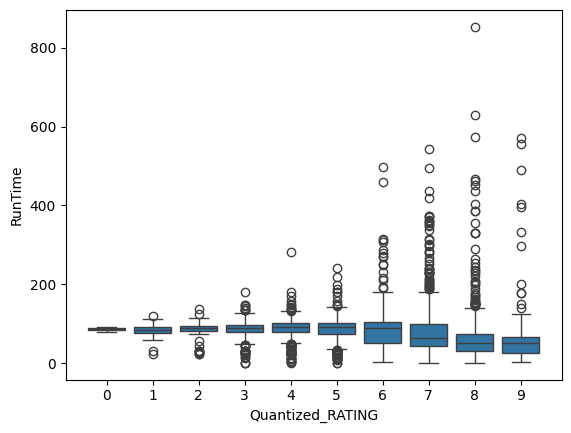

In [115]:
#Boxplot of Runtime of movies according to no of films of a particular rating.
sns.boxplot(x=df.Quantized_RATING, y=df.RunTime)
plt.plot()


    
(c.) Violinplot

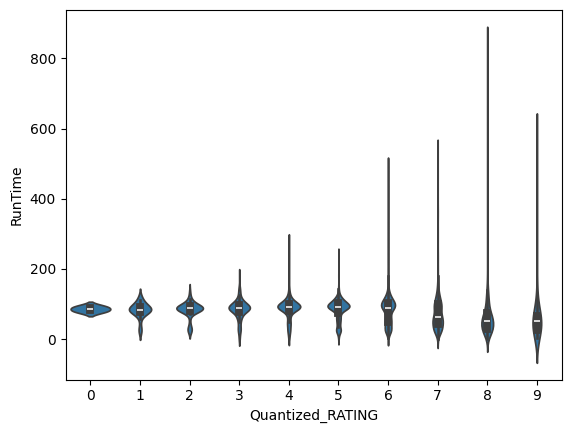

In [116]:
sns.violinplot(x=df.Quantized_RATING, y=df.RunTime)
plt.show()

(d.) Z-test

In [117]:
# Will perform z-test on with "Quantized_RATING" and "RunTime" of applicants. We do a z-test as number of applicannts >30.
# z-test can be used to test for significant difference in the means of both groups(rating =1 and 2).

A=  df.loc[df["Quantized_RATING"]==1, "RunTime"]
B = df.loc[df["Quantized_RATING"]==2, "RunTime"]

z_statistic, p_value = stats.ttest_ind(A,B,equal_var=False)  
#Here, doing equal_var=False ensures that we perform a z-test (aka Welch t-test), not a t-test(equal variance).

print(p_value)

#Inference : Hence, as p_value>0.05 ; so we conclude there is NO significant difference between means of both groups(rating =1 and 2).

0.8436390676546235


(e.) ANOVA Test

In [120]:
#Performing ANOVA Test between of ratings( =1,2,3).

a = df.loc[df['Quantized_RATING'] == 1, 'RunTime']
b = df.loc[df['Quantized_RATING'] == 2, 'RunTime']
c = df.loc[df['Quantized_RATING'] == 3, 'RunTime']

f_value,p_value = stats.f_oneway(a,b,c)
print(p_value)

#Inference : As p_value of ANOVA test is >0.05 ; hence we conclude there is NO significant difference between mean ratings(=1,2,3) acording to their runtime.

0.9028249526298628


3. Categorical-Categorical

   (a) Heatmap

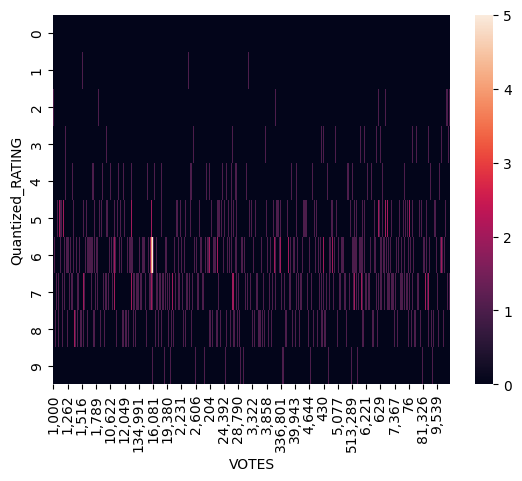

In [123]:
sns.heatmap(pd.crosstab(df.Quantized_RATING, df.VOTES))
plt.show()

(b.) Chi-2 Contingency test

In [127]:
#Performing chi2-test between  "Quantized_RATING" and "RunTime"

chi_2_statistic, p_value, dof, expected_freq = chi2_contingency(pd.crosstab(df.Quantized_RATING, df.RunTime) )

print(f"p-value of chi-2 test is {p_value}")

#Inference : p-value >=0.5 
#Hence, we conclude that their is NO SIGNIFICANT association between rating and runtime

p-value of chi-2 test is 1.194935400019244e-23
